# Machine Learning Pipeline - Model Training - Decission Tree

En este notebook, recogemos los conjuntos de datos transformados y las variables seleccionadas que guardamos en los notebooks anteriores

# Reproducibilidad: sembramos la semilla

Con el objetivo de garantizar la reproducibilidad entre ejecuciones del mismo notebook, pero también entre el entorno de investigación y producción, para cada paso que incluya algún elemento de aleatoriedad, es extremadamente importante que **establezcamos la semilla**

In [15]:
# Para manipulacion de datos
import pandas as pd
import numpy as np

# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Para guardar el modelo
import joblib

# Para construir los modelos
#Clasificación
from sklearn.tree import DecisionTreeClassifier

# Para evaluar los modelos
from sklearn.metrics import roc_auc_score, classification_report

# Para visualizar todas las columnas del dataframe
pd.pandas.set_option('display.max_columns', None)

In [16]:
# cargar el conjunto de entrenamiento y el de prueba con las variables diseñadas 
# construimos y guardamos estos conjuntos de datos en el notebook anterior. 

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_disc_corr,TotalCharges_disc_corr
0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,0,2,2,2
1,1,0,0,0,1,0,0,2,2,2,2,2,2,2,0,1,3,1
2,0,0,1,0,1,1,2,0,0,1,1,0,0,0,1,1,2,2
3,1,0,1,0,1,1,2,0,1,0,1,0,0,0,1,3,0,0
4,0,0,1,0,1,1,1,1,1,1,0,0,0,2,0,2,3,3


In [17]:
# Cargamos la target

y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

y_train.head()

,Churn
0,0
1,0
2,0
3,1
4,0


### Instanciamos el modelo de Arbol de decision: 

Recordamos sembrar la semilla.

In [18]:
# configurar el modelo 
# recuerdar establecer random_state / seed

# Instancia

#Instanciar
ac = DecisionTreeClassifier(max_depth=10)

#Entrenar
ac.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [19]:
# evalua el modelomos: 

pred = ac.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# make predictions for test set
pred = ac.predict_proba(X_test)[:,1]

# determine auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

ac_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.9313261326108369

test auc: 0.7584954403368727



In [8]:
alphas = ac.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
alphas

array([0.00000000e+00, 7.44071291e-06, 1.35880412e-05, 1.66778283e-05,
       1.67881233e-05, 1.69041703e-05, 2.29289899e-05, 2.92342709e-05,
       4.13650776e-05, 4.14152171e-05, 4.17632442e-05, 4.22604256e-05,
       4.34937489e-05, 4.35362121e-05, 4.56412597e-05, 4.65156133e-05,
       4.78281628e-05, 4.96781647e-05, 5.14474747e-05, 5.17690214e-05,
       5.28255321e-05, 5.70515746e-05, 5.91645959e-05, 6.07538769e-05,
       6.08678760e-05, 6.14401573e-05, 6.26409052e-05, 6.31089023e-05,
       6.31089023e-05, 7.09975151e-05, 7.15155088e-05, 7.15941329e-05,
       7.16801835e-05, 7.20051117e-05, 7.37281887e-05, 7.76846060e-05,
       8.06789944e-05, 8.11400172e-05, 8.11400172e-05, 8.19202097e-05,
       8.30219816e-05, 8.45208513e-05, 8.50038276e-05, 8.58840908e-05,
       8.60575940e-05, 8.60575940e-05, 8.68176136e-05, 8.71333140e-05,
       8.87468939e-05, 8.87468939e-05, 8.87468939e-05, 9.12825194e-05,
       9.13965555e-05, 9.17489735e-05, 9.28626918e-05, 9.31842386e-05,
      

In [9]:
arboles = []

for alpha in alphas:
    arbol = DecisionTreeClassifier(ccp_alpha=alpha)
    arbol.fit(X_train, y_train)
    arboles.append(arbol)

arboles

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=7.440712912665557e-06),
 DecisionTreeClassifier(ccp_alpha=1.358804116497088e-05),
 DecisionTreeClassifier(ccp_alpha=1.6677828303258708e-05),
 DecisionTreeClassifier(ccp_alpha=1.678812332338688e-05),
 DecisionTreeClassifier(ccp_alpha=1.690417025880281e-05),
 DecisionTreeClassifier(ccp_alpha=2.2928989915144903e-05),
 DecisionTreeClassifier(ccp_alpha=2.9234270918164908e-05),
 DecisionTreeClassifier(ccp_alpha=4.136507764601128e-05),
 DecisionTreeClassifier(ccp_alpha=4.141521713406707e-05),
 DecisionTreeClassifier(ccp_alpha=4.176324416880719e-05),
 DecisionTreeClassifier(ccp_alpha=4.226042564700724e-05),
 DecisionTreeClassifier(ccp_alpha=4.349374893670879e-05),
 DecisionTreeClassifier(ccp_alpha=4.353621208163356e-05),
 DecisionTreeClassifier(ccp_alpha=4.564125969876777e-05),
 DecisionTreeClassifier(ccp_alpha=4.651561333284367e-05),
 DecisionTreeClassifier(ccp_alpha=4.7828162844138e-05),
 DecisionTreeClassifier(ccp_alpha=4.96781646

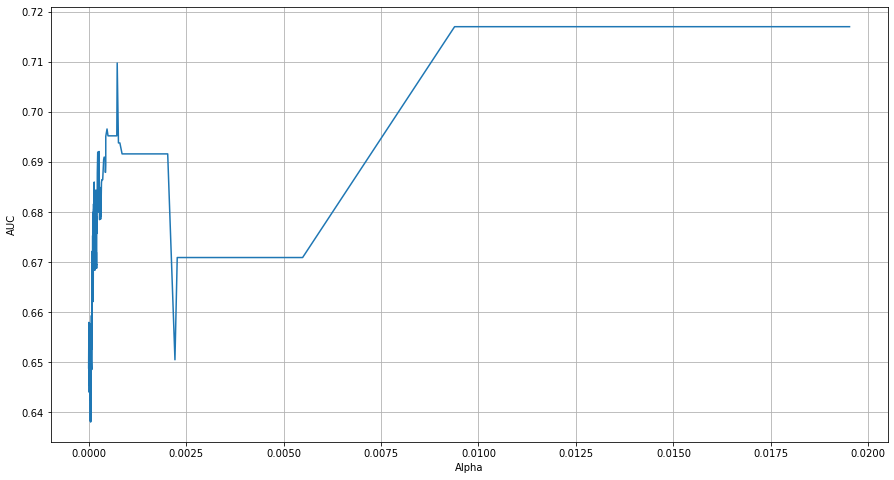

In [10]:

valores_auc = [roc_auc_score(y_test, arbol.predict(X_test)) for arbol in arboles]

plt.figure(figsize=(15 , 8))
plt.grid()
plt.plot(alphas[:-1], valores_auc[:-1])
plt.xlabel("Alpha")
plt.ylabel("AUC");

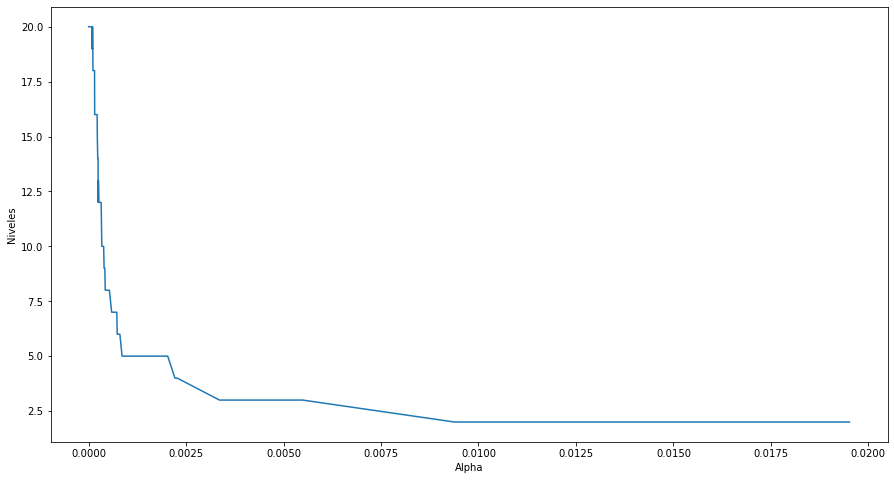

In [11]:
niveles = [arbol.tree_.max_depth for arbol in arboles]
plt.figure(figsize=(15,  8))
plt.plot(alphas[:-1], niveles[:-1])
plt.xlabel("Alpha")
plt.ylabel("Niveles");

In [12]:
ac = DecisionTreeClassifier(ccp_alpha=0.00055)

ac.fit(X_train,y_train)

pred = ac.predict_proba(X_test)[:,1]

roc_auc_score(y_test,pred)

0.827998656643158

In [13]:
ac.get_params()

{'ccp_alpha': 0.00055,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

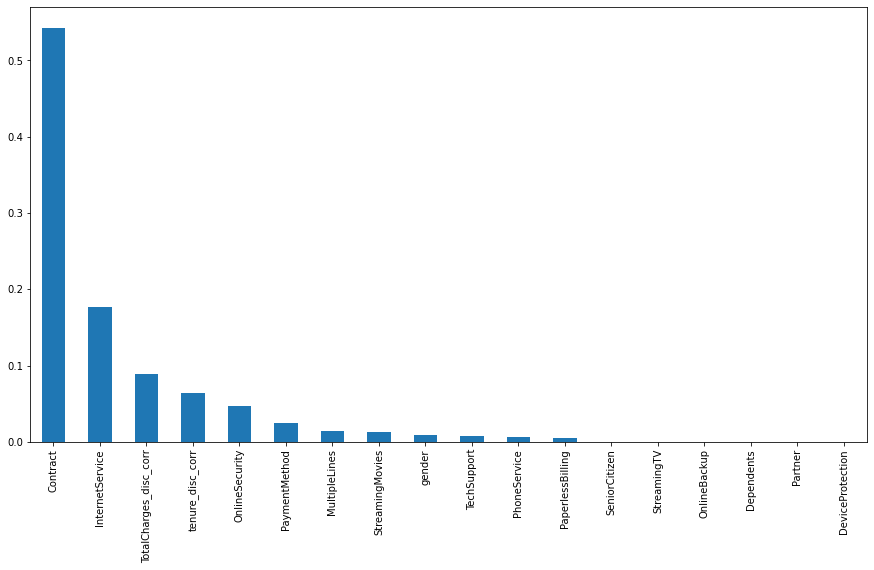

In [14]:
pd.Series(ac.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize=(15,8));

In [20]:
pd.DataFrame(ac_auc,index=['Arbol_Dec']).to_csv('ac_auc.csv',index=False)